# Modeling

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [28]:
# Read data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train_y = train["label"]
train_X = train.drop(columns=["label"]).to_numpy()
test_y = test["label"]
test_X = test.drop(columns=["label"]).to_numpy()

In [29]:
# Store model scores
models = {
    "Model": [],
    "Train Accuracy": [],
    "Train F1": [],
    "Train Precision": [],
    "Train Recall": [],
    "Test Accuracy": [],
    "Test F1": [],
    "Test Precision": [],
    "Test Recall": [],
}

In [30]:
def print_scores(accuracy, f1, precision, recall):
    """Print accuracy, f1, precision, and recall."""
    print("Accuracy: {}%".format(accuracy))
    print("F1: {}%".format(f1))
    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))

In [31]:
def get_scores(true_y, pred_y):
    """Get accuracy, f1, precision, and recall."""
    accuracy = round(100 * accuracy_score(true_y, pred_y), 1)
    precision = round(100 * precision_score(true_y, pred_y), 1)
    recall = round(100 * recall_score(true_y, pred_y), 1)
    f1 = round(100 * f1_score(true_y, pred_y), 1)
    
    return (accuracy, f1, precision, recall)

In [32]:
def run_model_no_cv(model_name, model, train_X, train_y, test_X, test_y):
    """Run model and add scores to models dict."""
    
    # Fit model
    model.fit(train_X, train_y)
    
    # Predict with train dataset
    pred_train_y = model.predict(train_X)
    
    # Predict with test dataset
    pred_test_y = model.predict(test_X)
    
    # Record model
    models["Model"].append(model_name)
    
    # Record train scores
    accuracy, f1, precision, recall = get_scores(train_y, pred_train_y)
    models["Train Accuracy"].append(accuracy)
    models["Train F1"].append(f1)
    models["Train Precision"].append(precision)
    models["Train Recall"].append(recall)
    
    # Record test scores
    accuracy, f1, precision, recall = get_scores(test_y, pred_test_y)
    models["Test Accuracy"].append(accuracy)
    models["Test F1"].append(f1)
    models["Test Precision"].append(precision)
    models["Test Recall"].append(recall)
    
    # Print test scores
    print_scores(accuracy, f1, precision, recall)

In [34]:
def run_model(model_name, model, train_X, train_y, test_X, test_y):
    """Run model and add scores to models dict."""
    
    # Specify scorings for the cross validation
    scoring = {
        "accuracy": make_scorer(accuracy_score), 
        "f1": make_scorer(f1_score),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score), 
    }
    
    # Fit model with CV (to record train scores with CV)
    cv_results = cross_validate(model, train_X, train_y, cv=5, scoring=scoring)

    # Fit model
    model.fit(train_X, train_y)
    
    # Predict with test dataset
    pred_test_y = model.predict(test_X)
    
    # Record model
    models["Model"].append(model_name)
    
    # Record train scores
    models["Train Accuracy"].append(round(100*cv_results["test_accuracy"].mean(), 1))
    models["Train F1"].append(round(100*cv_results["test_f1"].mean(), 1))
    models["Train Precision"].append(round(100*cv_results["test_precision"].mean(), 1))
    models["Train Recall"].append(round(100*cv_results["test_recall"].mean(), 1))
    
    # Record test scores
    accuracy, f1, precision, recall = get_scores(test_y, pred_test_y)
    models["Test Accuracy"].append(accuracy)
    models["Test F1"].append(f1)
    models["Test Precision"].append(precision)
    models["Test Recall"].append(recall)
    
    # Print test scores
    print_scores(accuracy, f1, precision, recall)

## Benchmark Model

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [171]:
knn = KNeighborsClassifier(n_neighbors=2)
run_model_no_cv("KNN (no cross validation)", knn, train_X, train_y, test_X, test_y)

Accuracy: 66.9%
F1: 36.7%
Precision: 56.9%
Recall: 27.1%


The benchmark model performs rather poorly with 67% accuracy but 37% F1 score. 

The precision is 57%. In other words, the model is only capturing 57% of the true population that would respond to the given offers. 

The recall of 27% is very low, which means that the model is assuming that customers won't respond to certain offers when they actually would have. Ideally, the recall should be high if the marketing campaign wanted to reach more people.

In [172]:
pd.DataFrame(models)

,Model,Train Accuracy,Train F1,Train Precision,Train Recall,Test Accuracy,Test F1,Test Precision,Test Recall
0,KNN (no cross validation),82.1,66.2,100.0,49.5,66.9,36.7,56.9,27.1


Seeing that the train dataset performs significantly better than the test dataset, the model is clearly overfitting. Cross-validation should help inform which model fits best with less overfitting. After choosing a type of model, tuning with regularization hyperparameters should help decrease overfitting even more.

In [173]:
knn = KNeighborsClassifier(n_neighbors=2)
run_model("KNN", knn, train_X, train_y, test_X, test_y)

Accuracy: 66.9%
F1: 36.7%
Precision: 56.9%
Recall: 27.1%


## Preliminary Models

Fit and test different types of models without tuning to see how they tend to perform. 

#### Support Vector Classification

In [11]:
from sklearn.svm import LinearSVC, SVC

In [175]:
svc = LinearSVC(random_state=42)
run_model("Linear SVC", svc, train_X, train_y, test_X, test_y)

/Users/sarinachen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/sarinachen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/sarinachen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/sarinachen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/sarinachen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976

Accuracy: 66.5%
F1: 34.8%
Precision: 56.2%
Recall: 25.2%


/Users/sarinachen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [176]:
svc = SVC(random_state=42)
run_model("SVC (RGB)", svc, train_X, train_y, test_X, test_y)

Accuracy: 71.3%
F1: 49.0%
Precision: 66.4%
Recall: 38.8%


#### Logistic Regression

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
lr = LogisticRegression(random_state=42)
run_model("Logistic Regression", lr, train_X, train_y, test_X, test_y)

Accuracy: 66.4%
F1: 36.1%
Precision: 55.5%
Recall: 26.7%


#### Decision Tree Classification

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dtc = DecisionTreeClassifier(random_state=42)
run_model("Decision Tree", dtc, train_X, train_y, test_X, test_y)

Accuracy: 64.5%
F1: 50.3%
Precision: 50.0%
Recall: 50.7%


#### Ensemble Models

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rfc = RandomForestClassifier(random_state=42)
run_model("Random Forest", rfc, train_X, train_y, test_X, test_y)

Accuracy: 70.5%
F1: 54.0%
Precision: 60.5%
Recall: 48.8%


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
gbc = GradientBoostingClassifier(random_state=42)
run_model("Gradient Boosting", gbc, train_X, train_y, test_X, test_y)

Accuracy: 72.1%
F1: 52.1%
Precision: 66.7%
Recall: 42.8%


In [185]:
# See fitting results and how well they score against test data
pd.DataFrame(models)

,Model,Train Accuracy,Train F1,Train Precision,Train Recall,Test Accuracy,Test F1,Test Precision,Test Recall
0,KNN (no cross validation),82.100000,66.200000,100.000000,49.500000,66.9,36.7,56.9,27.1
1,KNN,0.673029,0.375939,0.581462,0.277836,66.9,36.7,56.9,27.1
2,Linear SVC,0.666574,0.355790,0.565735,0.259840,66.5,34.8,56.2,25.2
3,SVC (RGB),0.713606,0.488128,0.666302,0.385182,71.3,49.0,66.4,38.8
4,Logistic Regression,0.665156,0.366474,0.557353,0.273311,66.4,36.1,55.5,26.7
5,Decission Tree,0.633067,0.489620,0.482989,0.496474,64.5,50.3,50.0,50.7
6,Random Forest,0.697431,0.527090,0.591099,0.475637,70.5,54.0,60.5,48.8
7,Gradient Boosting,0.717916,0.512961,0.661523,0.419071,72.1,52.1,66.7,42.8


The first model KNN shows that the model overfits and requires cross-validation to reflect a more realistic score. With cross-validation in the subsequent, the training scores reflect test scores better. Later on, some ways of handling overfitting include adding more data (which we don't have), reducing the number of features, and using regularization.

Out of the 7 types of models, the 2 ensemble models perform the best, with **Gradient Boosting** slightly better than **Random Forest**.

**Decision Tree** and **Support Vector Classifier** also have better F1 scores than the benchmark model.

For tuning models, I will pick 2 models to experiment with. Even though the last 2 models performed the best, I am choosing to tune the Gradient Boosting Classifier and Support Vector Classifier, which are 2 different types of models (as opposed to both ensemble models).

## Hyperparameter Tuning

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#### Support Vector Machine

In [55]:
model=SVC()

# Larger C (more punishment on penalty) => overfit, Larger gamma => overfit 
param_grid = {"C": [1, .01], "gamma": [10, 1]}

kfold = KFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=5)
grid_search.fit(train_X, train_y)
grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  7.6min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  8.6min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.3min finished


{'C': 1, 'gamma': 1}

In [13]:
model=SVC()

# Larger C (more punishment on penalty) => overfit, Larger gamma => overfit 
param_grid = {"C": [1, .01, .001], "gamma": [1, .1, .01]}

kfold = KFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=5)
grid_search.fit(train_X, train_y)
grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
/Users/sarinachen/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  9.5min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 10.2min finished


{'C': 1, 'gamma': 1}

In [22]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,177.368824,24.821479,11.326293,0.134378,1,1,"{'C': 1, 'gamma': 1}",0.504933,0.513110,0.507564,0.512926,0.502144,0.508135,0.004340,1
1,76.787069,3.001430,9.986992,0.367901,1,0.1,"{'C': 1, 'gamma': 0.1}",0.491205,0.495310,0.502667,0.488616,0.489627,0.493485,0.005127,2
2,74.275015,2.803524,11.466666,0.588392,1,0.01,"{'C': 1, 'gamma': 0.01}",0.363671,0.352019,0.368379,0.362165,0.329775,0.355202,0.013788,3
4,85.826534,3.007520,12.623096,0.246241,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.257322,0.249947,0.266696,0.258934,0.226053,0.251790,0.013926,4
3,89.364387,2.085711,12.780059,0.241913,0.01,1,"{'C': 0.01, 'gamma': 1}",0.000000,0.001049,0.000539,0.000000,0.000520,0.000422,0.000393,5
5,84.387152,1.531406,12.641575,0.282472,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
6,82.336634,3.530188,13.279525,0.422779,0.001,1,"{'C': 0.001, 'gamma': 1}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
7,89.430690,1.781649,12.681464,0.441327,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
8,65.989669,18.905263,8.015471,2.359072,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6


In [17]:
# Try removing some features
train_X2 = train.drop(columns=["label", "prior_number_transactions", "prior_received", "prior_spend_amt"]).to_numpy()

model=SVC()

param_grid = {"C": [1, .03], "gamma": [1, .3]}

kfold = KFold(n_splits=5)
grid_search2 = GridSearchCV(model, param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=5)
grid_search2.fit(train_X2, train_y)
grid_search2.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  3.4min remaining:  3.4min
/Users/sarinachen/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  4.2min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.1min finished


{'C': 1, 'gamma': 1}

In [21]:
pd.DataFrame(grid_search2.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,132.186267,10.150113,9.589521,0.279560,1,1,"{'C': 1, 'gamma': 1}",0.510182,0.518135,0.527368,0.507078,0.517662,0.516085,0.007071,1
1,98.506275,11.147708,8.866189,0.556816,1,0.3,"{'C': 1, 'gamma': 0.3}",0.508947,0.510207,0.514629,0.500815,0.505692,0.508058,0.004619,2
3,79.376194,8.879311,10.860957,9.801024,0.03,0.3,"{'C': 0.03, 'gamma': 0.3}",0.409302,0.423732,0.412171,0.411225,0.394450,0.410176,0.009348,3
2,86.790714,7.930210,10.428060,0.600005,0.03,1,"{'C': 0.03, 'gamma': 1}",0.323752,0.329454,0.338063,0.326122,0.318209,0.327120,0.006587,4


The default parameters that control regularization had the highest F1 scores. Dropping a few columns helped increase the F1 score by 0.8%.

#### Gradient Boosting

In [19]:
model=GradientBoostingClassifier()

param_grid = {"min_samples_split": [10, 30, 50], "max_depth": [5, 12, 15]}
kfold = KFold(n_splits=5)
grid_search3 = GridSearchCV(model, param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=5)
grid_search3.fit(train_X, train_y)
grid_search3.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  1.8min remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.9min finished


{'max_depth': 12, 'min_samples_split': 50}

In [23]:
pd.DataFrame(grid_search3.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,20.098824,0.049391,0.062520,0.001213,12,50,"{'max_depth': 12, 'min_samples_split': 50}",0.546163,0.548548,0.554812,0.539172,0.538360,0.545411,0.006123,1
4,19.807984,0.585802,0.064796,0.002469,12,30,"{'max_depth': 12, 'min_samples_split': 30}",0.537694,0.542586,0.546156,0.536845,0.540012,0.540658,0.003397,2
3,20.810423,0.087306,0.067371,0.001512,12,10,"{'max_depth': 12, 'min_samples_split': 10}",0.537579,0.542575,0.549853,0.533058,0.537681,0.540149,0.005710,3
2,8.572885,0.049406,0.027670,0.001799,5,50,"{'max_depth': 5, 'min_samples_split': 50}",0.543292,0.537129,0.549640,0.538084,0.527225,0.539074,0.007411,4
8,23.044359,0.595383,0.066992,0.008306,15,50,"{'max_depth': 15, 'min_samples_split': 50}",0.537203,0.537993,0.551291,0.533020,0.534267,0.538755,0.006530,5
1,8.638596,0.021887,0.029923,0.006975,5,30,"{'max_depth': 5, 'min_samples_split': 30}",0.540696,0.537189,0.548220,0.539281,0.527902,0.538657,0.006540,6
0,8.657738,0.023658,0.028774,0.002550,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.539970,0.538438,0.551930,0.536555,0.525813,0.538541,0.008334,7
7,26.311870,0.523468,0.088328,0.002192,15,30,"{'max_depth': 15, 'min_samples_split': 30}",0.539007,0.536368,0.542525,0.536064,0.537588,0.538310,0.002349,8
6,31.531116,0.390477,0.101321,0.001540,15,10,"{'max_depth': 15, 'min_samples_split': 10}",0.533615,0.532094,0.542861,0.528933,0.533104,0.534121,0.004663,9


In [24]:
model=GradientBoostingClassifier()

param_grid = {"min_samples_split": [10, 30, 50], "max_depth": [5, 12, 15]}
kfold = KFold(n_splits=5)
grid_search4 = GridSearchCV(model, param_grid, cv=kfold, scoring='f1', n_jobs=-1, verbose=5)
grid_search4.fit(train_X2, train_y)
grid_search4.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  1.5min remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.6min finished


{'max_depth': 12, 'min_samples_split': 50}

In [25]:
pd.DataFrame(grid_search4.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,17.508952,0.058941,0.060660,0.003279,12,50,"{'max_depth': 12, 'min_samples_split': 50}",0.539417,0.541325,0.550625,0.530375,0.543723,0.541093,0.006565,1
4,17.148139,0.549761,0.060748,0.004966,12,30,"{'max_depth': 12, 'min_samples_split': 30}",0.539528,0.543681,0.548712,0.528447,0.537174,0.539508,0.006781,2
3,18.019256,0.112273,0.065301,0.003366,12,10,"{'max_depth': 12, 'min_samples_split': 10}",0.538451,0.542441,0.545428,0.520714,0.544696,0.538346,0.009145,3
8,20.027388,0.496115,0.062320,0.007043,15,50,"{'max_depth': 15, 'min_samples_split': 50}",0.534907,0.540728,0.541039,0.524633,0.532894,0.534840,0.006018,4
7,22.762008,0.492581,0.082310,0.001757,15,30,"{'max_depth': 15, 'min_samples_split': 30}",0.534475,0.534327,0.534734,0.522423,0.530971,0.531386,0.004689,5
1,7.478611,0.241330,0.026346,0.002109,5,30,"{'max_depth': 5, 'min_samples_split': 30}",0.530619,0.533042,0.542109,0.523373,0.524524,0.530733,0.006745,6
6,27.222423,0.276596,0.095333,0.002435,15,10,"{'max_depth': 15, 'min_samples_split': 10}",0.533775,0.531764,0.535107,0.514649,0.527420,0.528543,0.007418,7
2,7.180994,0.036198,0.025585,0.002862,5,50,"{'max_depth': 5, 'min_samples_split': 50}",0.529854,0.533727,0.537772,0.515480,0.522632,0.527893,0.007965,8
0,7.628521,0.052347,0.028549,0.003426,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.529801,0.530312,0.539344,0.518061,0.520075,0.527519,0.007716,9


The best performing model is the Gradient Boosting Classifier with the tree-specific hyperparameters of `max_depth=12` and `min_samples_split=50`. The F1 score is 54%, which is better than the original 52% without tuning. Using the entire test dataset features was only 0.4% better than dropping 3 features.

## Model Evaluation

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [35]:
model=GradientBoostingClassifier(random_state=42, **{'max_depth': 12, 'min_samples_split': 50})
model.fit(train_X, train_y)

run_model("Gradient Boosting (tuned)", model, train_X, train_y, test_X, test_y)

Accuracy: 72.5%
F1: 56.5%
Precision: 64.4%
Recall: 50.2%


We achieved higher scores than the benchmark and untuned model!

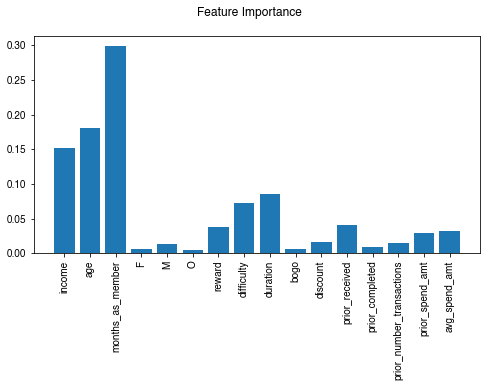

In [51]:
fig, ax = plt.subplots(figsize=[8,4])
fig.suptitle("Feature Importance")

ax.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(rotation=90)
ax.set_xticks(np.arange(len(train.columns[1:])))
ax.set_xticklabels(train.columns[1:])

plt.show()

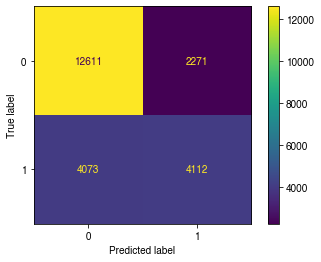

In [54]:
plot_confusion_matrix(model, test_X, test_y)  